In [211]:
import warnings
warnings.filterwarnings('ignore')

# 데이터 읽기를 위한 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

# Data Load

In [212]:
df_train = pd.read_csv("C:/Users/SNUAI/challenge_train.csv")
df_test = pd.read_csv("C:/Users/SNUAI/challenge_test.csv")

In [213]:
df_train_org = df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89782 entries, 0 to 89781
Data columns (total 87 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             89782 non-null  int64  
 1   LOT_ID          89782 non-null  object 
 2   WF_ID           89782 non-null  int64  
 3   X_AXIS          89782 non-null  int64  
 4   Y_AXIS          89782 non-null  int64  
 5   GRADE_CD        89782 non-null  object 
 6   G_A             89782 non-null  int64  
 7   G_B             89782 non-null  int64  
 8   G_C             89782 non-null  int64  
 9   G_D             89782 non-null  int64  
 10  G_E             89782 non-null  int64  
 11  G_F             89782 non-null  int64  
 12  G_G             89782 non-null  int64  
 13  G_H             89782 non-null  float64
 14  G_I             89782 non-null  int64  
 15  G_J             89782 non-null  int64  
 16  G_K             89782 non-null  int64  
 17  G_L             89782 non-null 

In [214]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38479 entries, 0 to 38478
Data columns (total 86 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             38479 non-null  int64  
 1   LOT_ID          38479 non-null  object 
 2   WF_ID           38479 non-null  int64  
 3   X_AXIS          38479 non-null  int64  
 4   Y_AXIS          38479 non-null  int64  
 5   GRADE_CD        38479 non-null  object 
 6   G_A             38479 non-null  int64  
 7   G_B             38479 non-null  int64  
 8   G_C             38479 non-null  int64  
 9   G_D             38479 non-null  int64  
 10  G_E             38479 non-null  int64  
 11  G_F             38479 non-null  int64  
 12  G_G             38479 non-null  int64  
 13  G_H             38479 non-null  float64
 14  G_I             38479 non-null  int64  
 15  G_J             38479 non-null  int64  
 16  G_K             38479 non-null  int64  
 17  G_L             38479 non-null 

In [215]:
df_train.head()

,No.,LOT_ID,WF_ID,X_AXIS,Y_AXIS,GRADE_CD,G_A,G_B,G_C,G_D,...,Weight_Bound_L,Weight_Bound_M,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,PKT_Y
0,1,ABC1111,14,45,34,N1,0,0,0,0,...,0.0,0.0,0.0,2.305556,18.4375,4.5,0.0,0.000000,0.000000,0.0
1,2,ABC1258,19,40,43,N1,0,0,0,10,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.857143,7.032967,1.0
2,3,ABC1258,14,32,32,SQ,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0
3,4,ABC1258,12,24,14,N1,6,6,6,6,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0
4,5,ABC1258,7,20,34,SQ,0,0,0,5,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,22.777778,0.541667,0.0


In [216]:
df_test.head()

,No.,LOT_ID,WF_ID,X_AXIS,Y_AXIS,GRADE_CD,G_A,G_B,G_C,G_D,...,Weight_Bound_K,Weight_Bound_L,Weight_Bound_M,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T
0,89783,ABC1236,10,26,29,NQ,0,0,0,20,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.142857
1,89784,ABC1236,12,16,20,SQ,50,48,44,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,89785,ABC1236,17,47,22,SQ,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,89786,ABC1236,25,63,21,SQ,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.857143,0.285714,0.000000
4,89787,ABC1236,15,59,28,SQ,0,0,0,30,...,0.0,0.0,0.0,0.0,3.214286,48.809524,57.595238,19.863095,24.767857,14.547619


## Remove Features

In [217]:
df_train = df_train.drop(['No.', 'LOT_ID'], axis = 1)
df_test = df_test.drop(['No.', 'LOT_ID'], axis = 1)

## Check Null 

In [218]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

## Check Unique Values Shape 

In [267]:
for i in df_train.columns:
    print(i, np.unique(df_train[i]).shape)
    print(np.unique(df_train[i], return_counts=True)[0])
    print(np.unique(df_train[i], return_counts=True)[1])

WF_ID (25,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[3122 2228 2314 3285 2241 3236 2322 2016 3086 2337 2254 3249 3275 3278
 3157 3268 3203 3212 3236 3314 3300 3216 3345 2284 2332]
X_AXIS (58,)
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68]
[  79  415  552  663  762  873  955 1061 1107 1130 1176 1250 1291 1369
 1381 1417 1489 1427 1472 1512 1531 1549 1516 1600 1645 1584 1618 1624
 1617 1635 1615 1592 1609 1580 1598 1539 1550 1540 1546 1512 1486 1459
 1420 1396 1351 1349 1263 1265 1151 1158 1059  999  949  834  719  613
  423  235]
Y_AXIS (34,)
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44]
[ 437  998 1352 1614 1764 1955 2135 2253 2322 2429 2557 2609 2688 2711
 2745 2792 2793 2730 2795 2687 2689 2596 2578 2483 2478 2350 2263 2111
 1958 1826 1598 1351 1020  443]
G_A

G_J (85,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84]
[63892   375  1030   546   702   294   550   227   346   260   282   169
   430   134   166   130   129   105   157   107   120   105   100    80
   114    61    87    66    73    69    60    59    56    46    58    59
    73    34    35    35    41    41    28    30    29    18    25    18
    34    11    15     5    21    16    14     8    13     7     7    12
    11     8    10     9     6     7     3     2     6     5     5     8
    39     7    11     2     9    10     6    14     3    12     4     4
    95]
G_K (84,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 

Neighbor_A (10,)
[0 1 2 3 4 5 6 7 8 9]
[49683  9303  5119  3511  1841  1227   741   378   238    69]
Neighbor_B (10,)
[0 1 2 3 4 5 6 7 8 9]
[49263  9513  5423  3433  1882  1231   664   401   230    70]
Neighbor_C (10,)
[0 1 2 3 4 5 6 7 8 9]
[43658 12172  6565  4153  2408  1565   868   412   245    64]
Neighbor_D (10,)
[0 1 2 3 4 5 6 7 8 9]
[39984 12368  8403  5712  2808  1600   778   261   141    55]
Neighbor_E (10,)
[0 1 2 3 4 5 6 7 8 9]
[40022 12427  6988  4436  2925  2327  1672   790   419   104]
Neighbor_F (10,)
[0 1 2 3 4 5 6 7 8 9]
[49964  9061  5323  3377  1771  1221   767   343   222    61]
Neighbor_G (10,)
[0 1 2 3 4 5 6 7 8 9]
[45179 10550  5892  4275  2331  1662  1218   573   319   111]
Neighbor_H (19,)
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9. ]
[42354  2213 10391  1062  5845   687  3561   515  2097   348  1342   138
   781    28   413    11   257     2    65]
Neighbor_I (10,)
[0 1 2 3 4 5 6 7 8 9]
[43980 11639  6466  4193  2559  1587   93

Weight_Base_B (503,)
[0.00000000e+00 1.28205130e-02 1.38888890e-02 2.19780220e-02
 2.38095240e-02 3.57142860e-02 4.16666670e-02 4.76190480e-02
 5.55555560e-02 5.95238100e-02 6.25000000e-02 6.41025640e-02
 6.94444440e-02 7.14285710e-02 7.73809520e-02 8.33333330e-02
 9.02777780e-02 9.52380950e-02 9.61538460e-02 1.02564103e-01
 1.07142857e-01 1.11111111e-01 1.15384615e-01 1.19047619e-01
 1.25000000e-01 1.30952381e-01 1.31868132e-01 1.38888889e-01
 1.42857143e-01 1.48809524e-01 1.52777778e-01 1.66666667e-01
 1.78571429e-01 1.80555556e-01 1.90476190e-01 1.94444444e-01
 2.05128205e-01 2.08333333e-01 2.14285714e-01 2.22222222e-01
 2.24358974e-01 2.26190476e-01 2.32142857e-01 2.38095238e-01
 2.43055556e-01 2.47252747e-01 2.50000000e-01 2.56410256e-01
 2.61904762e-01 2.70833333e-01 2.73809524e-01 2.85714286e-01
 2.91666667e-01 2.97619048e-01 3.05555556e-01 3.07692308e-01
 3.12500000e-01 3.33333333e-01 3.39285714e-01 3.47222222e-01
 3.54166667e-01 3.57142857e-01 3.61111111e-01 3.65384615e-01
 3.

Weight_Base_C (882,)
[0.00000000e+00 2.38095240e-02 2.77777780e-02 3.57142860e-02
 3.84615380e-02 4.16666670e-02 4.39560440e-02 4.76190480e-02
 5.35714290e-02 5.95238100e-02 6.25000000e-02 6.41025640e-02
 6.59340660e-02 6.94444440e-02 7.14285710e-02 7.69230770e-02
 7.73809520e-02 8.33333330e-02 8.97435900e-02 9.02777780e-02
 9.52380950e-02 9.72222220e-02 1.02564103e-01 1.07142857e-01
 1.11111111e-01 1.25000000e-01 1.28205128e-01 1.30952381e-01
 1.38888889e-01 1.42857143e-01 1.52777778e-01 1.53846154e-01
 1.54761905e-01 1.60714286e-01 1.66666667e-01 1.70329670e-01
 1.75824176e-01 1.78571429e-01 1.79487179e-01 1.80555556e-01
 1.84523810e-01 1.87500000e-01 1.90476190e-01 1.94444444e-01
 1.96428571e-01 2.08333333e-01 2.14285714e-01 2.22222222e-01
 2.26190476e-01 2.30769231e-01 2.36111111e-01 2.44047619e-01
 2.50000000e-01 2.56410256e-01 2.61904762e-01 2.63736264e-01
 2.69230769e-01 2.85714286e-01 2.91666667e-01 2.96703297e-01
 2.97619048e-01 3.05555556e-01 3.07692308e-01 3.12500000e-01
 3.

Weight_Base_D (1477,)
[0.00000000e+00 1.19047620e-02 1.38888890e-02 ... 3.34595238e+02
 5.69523809e+02 5.98000000e+02]
[70039     1     1 ...     1     1     1]
Weight_Base_E (1149,)
[0.00000000e+00 1.09890110e-02 1.19047620e-02 ... 5.13440476e+02
 5.30845238e+02 1.52361905e+03]
[70571     2     3 ...     1     1     2]
Weight_Base_F (487,)
[0.00000000e+00 2.19780220e-02 2.38095240e-02 3.57142860e-02
 3.84615380e-02 4.16666670e-02 4.76190480e-02 5.55555560e-02
 7.14285710e-02 7.69230770e-02 8.33333330e-02 8.79120880e-02
 9.52380950e-02 9.72222220e-02 1.02564103e-01 1.04166667e-01
 1.07142857e-01 1.11111111e-01 1.15384615e-01 1.19047619e-01
 1.25000000e-01 1.28205128e-01 1.36904762e-01 1.38888889e-01
 1.42857143e-01 1.48809524e-01 1.53846154e-01 1.54761905e-01
 1.60714286e-01 1.66666667e-01 1.78571429e-01 1.80555556e-01
 1.87500000e-01 2.05128205e-01 2.14285714e-01 2.20238095e-01
 2.22222222e-01 2.30769231e-01 2.36111111e-01 2.38095238e-01
 2.43055556e-01 2.50000000e-01 2.55952381e-01 2

Weight_Base_G (1244,)
[0.00000000e+00 1.19047620e-02 2.19780220e-02 ... 3.85875000e+02
 3.95833333e+02 4.37500000e+02]
[70455     3     1 ...     1     1     1]
Weight_Base_H (963,)
[0.00000000e+00 5.95238100e-03 1.19047620e-02 1.28205130e-02
 1.38888890e-02 1.78571430e-02 2.19780220e-02 2.38095240e-02
 2.56410260e-02 2.77777780e-02 2.97619050e-02 3.57142860e-02
 3.84615380e-02 4.16666670e-02 4.76190480e-02 4.86111110e-02
 4.94505490e-02 5.55555560e-02 5.95238100e-02 6.41025640e-02
 6.94444440e-02 7.14285710e-02 7.69230770e-02 8.03571430e-02
 8.33333330e-02 8.92857140e-02 9.52380950e-02 9.72222220e-02
 1.04166667e-01 1.07142857e-01 1.10119048e-01 1.13095238e-01
 1.18131868e-01 1.19047619e-01 1.25000000e-01 1.27976190e-01
 1.28205128e-01 1.30952381e-01 1.31868132e-01 1.33928571e-01
 1.34615385e-01 1.38888889e-01 1.42857143e-01 1.45833333e-01
 1.51785714e-01 1.52777778e-01 1.53846154e-01 1.54761905e-01
 1.60256410e-01 1.63194444e-01 1.66666667e-01 1.77083333e-01
 1.78571429e-01 1.8055555

Weight_Base_I (864,)
[0.00000000e+00 1.19047620e-02 1.28205130e-02 1.38888890e-02
 1.78571430e-02 2.38095240e-02 2.56410260e-02 2.77777780e-02
 3.29670330e-02 3.57142860e-02 3.84615380e-02 4.16666670e-02
 4.39560440e-02 4.76190480e-02 5.12820510e-02 5.35714290e-02
 5.55555560e-02 5.95238100e-02 6.59340660e-02 6.94444440e-02
 7.14285710e-02 7.69230770e-02 7.73809520e-02 8.33333330e-02
 8.79120880e-02 8.92857140e-02 9.52380950e-02 1.04166667e-01
 1.07142857e-01 1.11111111e-01 1.15384615e-01 1.19047619e-01
 1.25000000e-01 1.41025641e-01 1.42857143e-01 1.45833333e-01
 1.48809524e-01 1.52777778e-01 1.59722222e-01 1.60714286e-01
 1.66666667e-01 1.72619048e-01 1.78571429e-01 1.79487179e-01
 1.86813187e-01 1.90476190e-01 1.94444444e-01 1.97802198e-01
 2.08333333e-01 2.14285714e-01 2.22222222e-01 2.29166667e-01
 2.30769231e-01 2.38095238e-01 2.41758242e-01 2.43055556e-01
 2.50000000e-01 2.56410256e-01 2.63736264e-01 2.67857143e-01
 2.69230769e-01 2.73809524e-01 2.82051282e-01 2.85714286e-01
 2.

Weight_Base_J (1207,)
[0.00000000e+00 1.19047620e-02 1.28205130e-02 ... 4.98208333e+02
 1.42291667e+03 1.52455357e+03]
[70422     1     1 ...     1     1     1]
Weight_Base_K (1262,)
[0.00000000e+00 1.19047620e-02 1.38888890e-02 ... 7.23993056e+02
 1.31178571e+03 1.33364881e+03]
[70377     1     1 ...     1     1     1]
Weight_Base_L (1331,)
[0.00000000e+00 1.19047620e-02 1.38888890e-02 ... 5.99444444e+02
 1.32392857e+03 1.34599405e+03]
[70365     2     1 ...     1     1     1]
Weight_Base_M (1317,)
[0.00000000e+00 1.19047620e-02 2.38095240e-02 ... 8.47448718e+02
 1.27300000e+03 1.40700000e+03]
[70356     3     2 ...     1     1     1]
Weight_Base_N (1031,)
[0.00000000e+00 1.28205130e-02 1.38888890e-02 ... 1.45108333e+03
 1.47702381e+03 1.58300000e+03]
[70764     1     1 ...     1     1     1]
Weight_Base_O (1683,)
[0.00000000e+00 1.19047620e-02 1.38888890e-02 ... 9.71000000e+02
 1.71521429e+03 1.94700000e+03]
[69717     2     2 ...     1     1     8]
Weight_Base_P (2541,)
[0.00000000e

Weight_Bound_B (902,)
[0.00000000e+00 1.19047620e-02 1.38888890e-02 2.38095240e-02
 3.29670330e-02 3.57142860e-02 4.39560440e-02 4.76190480e-02
 5.55555560e-02 5.95238100e-02 6.59340660e-02 6.94444440e-02
 7.14285710e-02 7.69230770e-02 7.73809520e-02 8.33333330e-02
 8.92857140e-02 9.52380950e-02 9.89010990e-02 1.11111111e-01
 1.19047619e-01 1.25000000e-01 1.26373626e-01 1.28205128e-01
 1.30952381e-01 1.31868132e-01 1.36904762e-01 1.38888889e-01
 1.41025641e-01 1.42857143e-01 1.52777778e-01 1.53846154e-01
 1.54761905e-01 1.59722222e-01 1.60714286e-01 1.66666667e-01
 1.72619048e-01 1.75824176e-01 1.78571429e-01 1.80555556e-01
 1.90476190e-01 2.02380952e-01 2.08333333e-01 2.14285714e-01
 2.19780220e-01 2.20238095e-01 2.22222222e-01 2.26190476e-01
 2.32142857e-01 2.36111111e-01 2.38095238e-01 2.44047619e-01
 2.47252747e-01 2.50000000e-01 2.61904762e-01 2.63736264e-01
 2.63888889e-01 2.73809524e-01 2.74725275e-01 2.77777778e-01
 2.79761905e-01 2.84722222e-01 2.85714286e-01 2.96703297e-01
 3

Weight_Bound_C (1602,)
[0.00000000e+00 1.09890110e-02 1.19047620e-02 ... 5.66785714e+02
 7.36821429e+02 7.93500000e+02]
[69741     1     7 ...     1     1     4]
Weight_Bound_D (2680,)
[0.00000000e+00 1.19047620e-02 2.19780220e-02 ... 2.03250000e+02
 2.77642857e+02 4.09345238e+02]
[68037     3     2 ...     2     1     1]
Weight_Bound_E (2017,)
[0.00000000e+00 1.09890110e-02 1.19047620e-02 ... 8.88777778e+02
 1.14271429e+03 1.16276191e+03]
[69050     5     4 ...     1     1     1]
Weight_Bound_F (879,)
[0.00000000e+00 1.09890110e-02 1.19047620e-02 2.19780220e-02
 2.38095240e-02 2.77777780e-02 3.29670330e-02 3.57142860e-02
 4.39560440e-02 4.76190480e-02 5.12820510e-02 5.35714290e-02
 5.95238100e-02 7.14285710e-02 7.73809520e-02 8.33333330e-02
 8.79120880e-02 8.92857140e-02 9.52380950e-02 9.72222220e-02
 9.89010990e-02 1.09890110e-01 1.11111111e-01 1.15384615e-01
 1.19047619e-01 1.20879121e-01 1.25000000e-01 1.28205128e-01
 1.30952381e-01 1.31868132e-01 1.41025641e-01 1.42857143e-01
 1.4

Weight_Bound_G (2233,)
[0.00000000e+00 1.09890110e-02 1.19047620e-02 ... 4.77062500e+02
 5.00000000e+02 5.23833333e+02]
[68835     2     5 ...     1     4     1]
Weight_Bound_H (1794,)
[0.00000000e+00 5.95238100e-03 1.09890110e-02 ... 8.04513889e+02
 8.73472222e+02 1.18214286e+03]
[69584     3     4 ...     1     1     2]
Weight_Bound_I (1566,)
[0.00000000e+00 1.19047620e-02 1.38888890e-02 ... 8.86138889e+02
 1.15930952e+03 1.17929762e+03]
[69781     7     1 ...     1     1     1]
Weight_Bound_J (2115,)
[0.00000000e+00 1.09890110e-02 1.19047620e-02 ... 1.16204861e+03
 1.17898809e+03 1.28062500e+03]
[68720     3     4 ...     1     1     1]
Weight_Bound_K (2221,)
[0.00000000e+00 1.19047620e-02 1.28205130e-02 ... 1.53041667e+03
 1.55227976e+03 1.62274306e+03]
[68682     5     1 ...     1     1     1]
Weight_Bound_L (2310,)
[0.00000000e+00 1.19047620e-02 1.38888890e-02 ... 1.42500000e+03
 1.52251786e+03 1.58871429e+03]
[68642     5     2 ...     1     1     1]
Weight_Bound_M (2318,)
[0.00

## Ohe-Hot Encoding 

In [220]:
df_train = pd.get_dummies(data = df_train, columns = ['GRADE_CD'], prefix = 'GRADE_CD')

In [221]:
df_test = pd.get_dummies(data = df_test, columns = ['GRADE_CD'], prefix = 'GRADE_CD')

In [222]:
df_train.drop_duplicates(keep='first', inplace=True, ignore_index=False)


In [223]:

## Train/Test set Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('PKT_Y', axis = 1), df_train.PKT_Y, 
                                                    train_size = 0.8, stratify = df_train.PKT_Y,
                                                    random_state = 42)

X_train.shape, y_train.shape[0], X_test.shape, y_test.shape[0]

((57688, 87), 57688, (14422, 87), 14422)

In [224]:
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

## Variance Clean 

In [225]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.01)
selector.fit(X_train_clean)
mask_clean = selector.get_support()
X_train_clean = X_train_clean[X_train_clean.columns[mask_clean]]

In [226]:
(len(df_train.columns) - 1) - X_train_clean.shape[1]

1

In [227]:
X_train_clean.shape[1]

86

<AxesSubplot:>

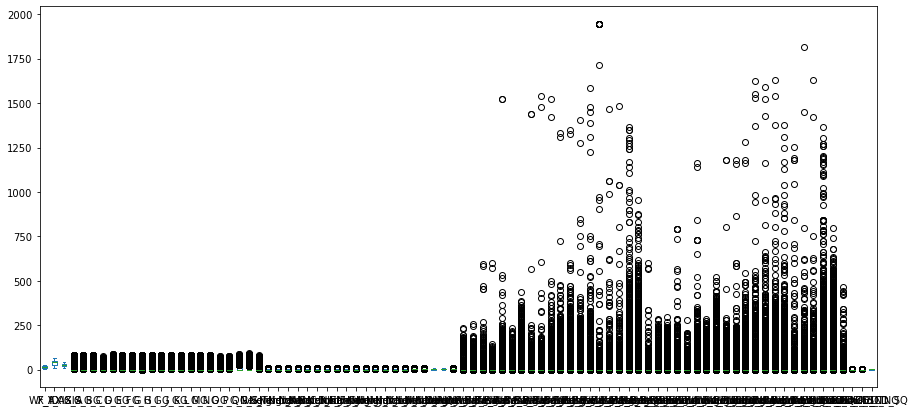

In [228]:


X_train_clean.plot.box(figsize=(15, 7))


,WF_ID,X_AXIS,Y_AXIS,G_A,G_B,G_C,G_D,G_E,G_F,G_G,...,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,GRADE_CD_N1,GRADE_CD_NQ,GRADE_CD_SQ
48164,15,27,14,0,0,13,0,26,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1,0,0
49893,19,21,30,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,1
59135,17,60,31,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.375,1,0,0
66312,11,12,26,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,1
29602,7,49,29,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,1


(57688, 86)
48164    0.0
49893    0.0
59135    0.0
66312    0.0
29602    0.0
Name: PKT_Y, dtype: float64
d v
vis done
d v
vis done
d v
vis done
d v
vis done
d v
vis done
d v
vis done
d v
vis done
d v
vis done
d v
vis done
d v
vis done


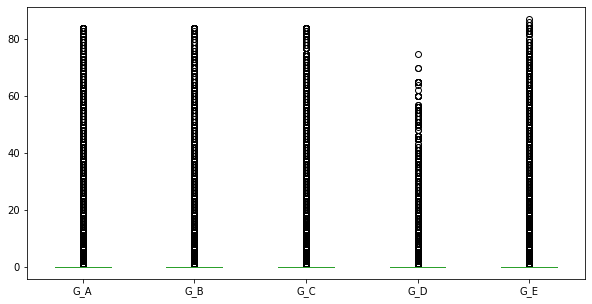

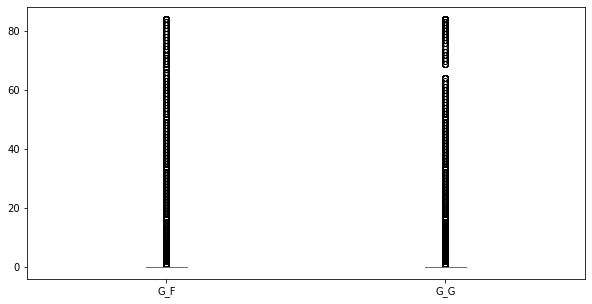

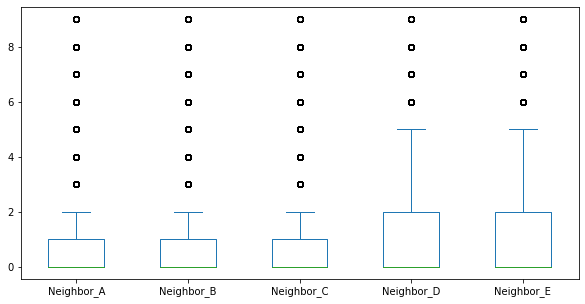

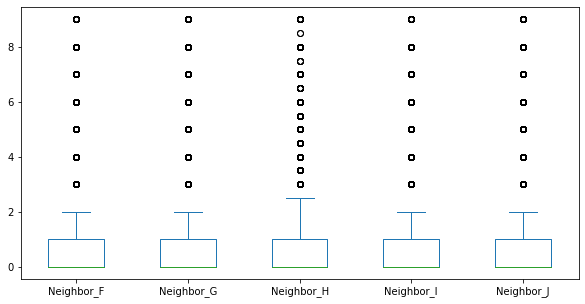

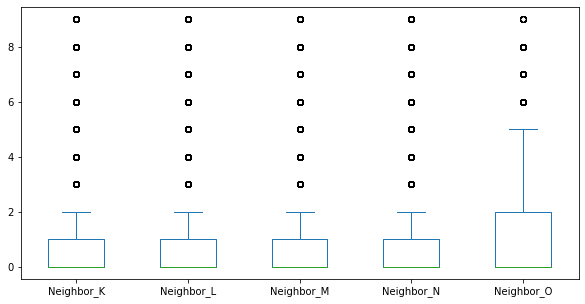

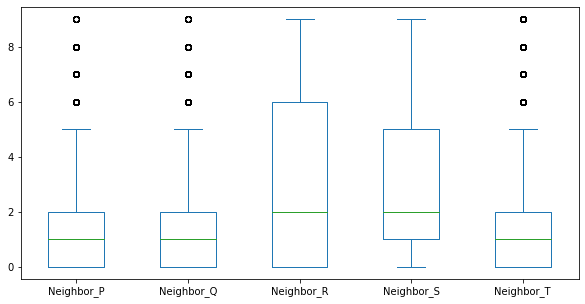

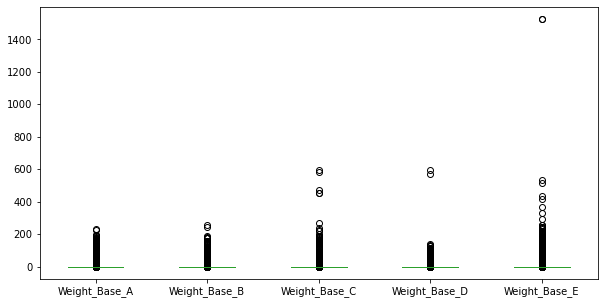

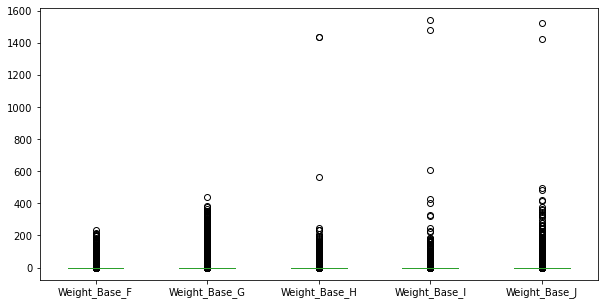

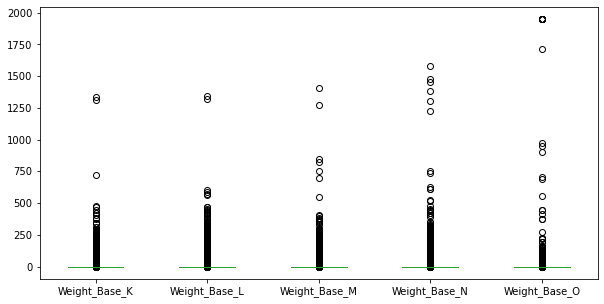

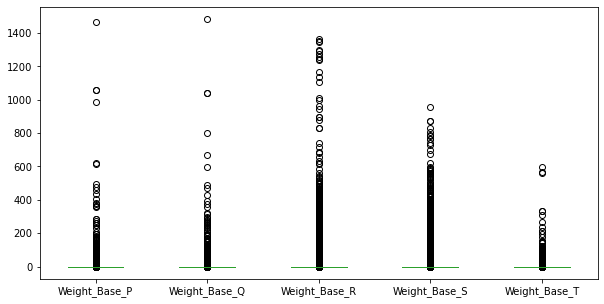

In [229]:
display(X_train_clean.head())

print(np.array(X_train_clean).shape)

df_G =  X_train_clean.loc[:,"G_A":"G_G"] 
df_N =  X_train_clean.loc[:,"Neighbor_A":"Neighbor_T"] 
df_W =  X_train_clean.loc[:,"Weight_Base_A":"Weight_Base_T"] 
print(y_train.head())

# display( df_G )
# display( df_N )
# display( df_W )


def draw_box(df, label) :
    cnt_features = np.array(df).shape[1]
    # Check Each BoxPlot
    layout_x = 10
    layout_y = 10
    #layout_y = (int)(cnt_features / layout_x + 1)
    step = 5
    for i in range(0, cnt_features-1, step) :
        print("d v")
#         display(df.iloc[:,i:(i+3)])
#         display( type ( df.iloc[:,i:i+3]) )
        if (cnt_features -1 - step) > 5 : 
            iloc_step = step 
        else :
            (cnt_features -1 - step)
        
        
        df.iloc[:,i:(i+step)].plot.box(figsize=(10,5))
        name = 'feature_' + label + "_" + str(i) + ".png"
        plt.savefig(name)

         


        print("vis done")
    #X_train_clean.plot.box(figsize=(10, 20)) #, subplots=True, layout=(layout_y, layout_x))

draw_box(df_G, "G")
draw_box(df_N, "N")
draw_box(df_W, "W")

In [230]:
print("test")

test


In [231]:
# Check Each BoxPlot
#X_train_clean.plot.box(figsize=(10, 20), subplots=True, layout=(30, 3))

print(type(y_train))
print(type(y_train[0]))

df_Y =  y_train.astype(int)

def draw_heat(df, label) :
    cnt_features = np.array(df).shape[1]
    
    step = 5
    print("cnt_features : ", cnt_features)
    print(df.corr())

    for i in range(0, cnt_features-1, step) :
        #print("d v")
        if(cnt_features > 10) :
            plt.figure(figsize = (16*2,5*2))
        else :
            plt.figure(figsize = (16,5))

        sns.heatmap(df.corr(),
            annot=True,
            fmt='.2f',
            cmap=sns.diverging_palette(240, 10, as_cmap=True),
            vmin=-1,
            vmax=1,
            linewidths=.9,
            cbar_kws={'shrink':0.7})
        plt.show()
        name = 'heat_' + label + "_" + str(i) + ".png"
        plt.savefig(name)
        
        
#display(df_G.head())
#display(df_Y.head())




<class 'pandas.core.series.Series'>
<class 'numpy.float64'>


,G_A,G_B,G_C,G_D,G_E,G_F,G_G,PKT_Y
48164,0,0,13,0,26,0,30,0
49893,0,0,0,0,0,0,0,0
59135,0,0,0,0,0,0,0,0
66312,0,0,0,0,0,0,0,0
29602,0,0,0,0,0,0,0,0


cnt_features :  8
            G_A       G_B       G_C       G_D       G_E       G_F       G_G  \
G_A    1.000000  0.949994  0.918754  0.058083  0.764760  0.948393  0.855496   
G_B    0.949994  1.000000  0.919615  0.059511  0.765671  0.944202  0.858029   
G_C    0.918754  0.919615  1.000000  0.081610  0.786697  0.917299  0.861706   
G_D    0.058083  0.059511  0.081610  1.000000  0.070077  0.059196  0.069721   
G_E    0.764760  0.765671  0.786697  0.070077  1.000000  0.764283  0.731737   
G_F    0.948393  0.944202  0.917299  0.059196  0.764283  1.000000  0.850180   
G_G    0.855496  0.858029  0.861706  0.069721  0.731737  0.850180  1.000000   
PKT_Y  0.058632  0.058155  0.059843  0.042174  0.083491  0.060696  0.051698   

          PKT_Y  
G_A    0.058632  
G_B    0.058155  
G_C    0.059843  
G_D    0.042174  
G_E    0.083491  
G_F    0.060696  
G_G    0.051698  
PKT_Y  1.000000  


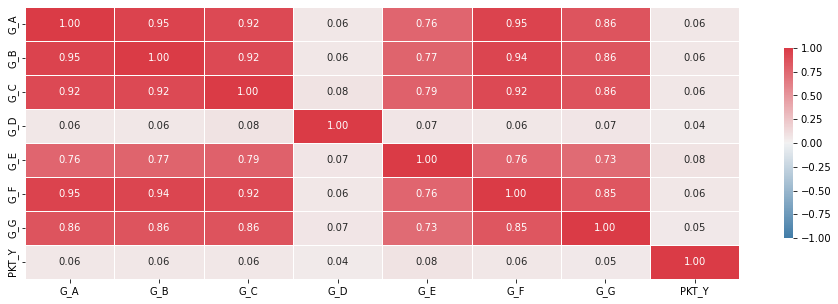

<Figure size 432x288 with 0 Axes>

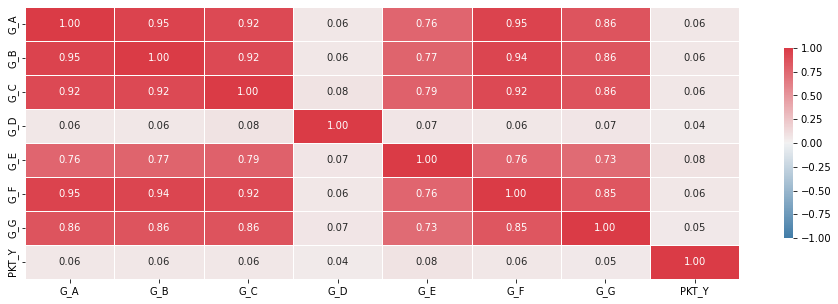

cnt_features :  21
            Neighbor_A  Neighbor_B  Neighbor_C  Neighbor_D  Neighbor_E  \
Neighbor_A    1.000000    0.903974    0.860906    0.053615    0.790831   
Neighbor_B    0.903974    1.000000    0.854911    0.059500    0.786466   
Neighbor_C    0.860906    0.854911    1.000000    0.078825    0.821610   
Neighbor_D    0.053615    0.059500    0.078825    1.000000    0.078853   
Neighbor_E    0.790831    0.786466    0.821610    0.078853    1.000000   
Neighbor_F    0.901554    0.899130    0.854860    0.052676    0.779884   
Neighbor_G    0.778064    0.772305    0.786019    0.025343    0.762966   
Neighbor_H    0.860589    0.858784    0.894428    0.084542    0.840446   
Neighbor_I    0.859246    0.853792    0.889265    0.080968    0.827510   
Neighbor_J    0.790465    0.785944    0.800243    0.029157    0.764733   
Neighbor_K    0.785801    0.781781    0.796111    0.027513    0.758009   
Neighbor_L    0.792758    0.788175    0.801396    0.034476    0.766376   
Neighbor_M    0.778

<Figure size 432x288 with 0 Axes>

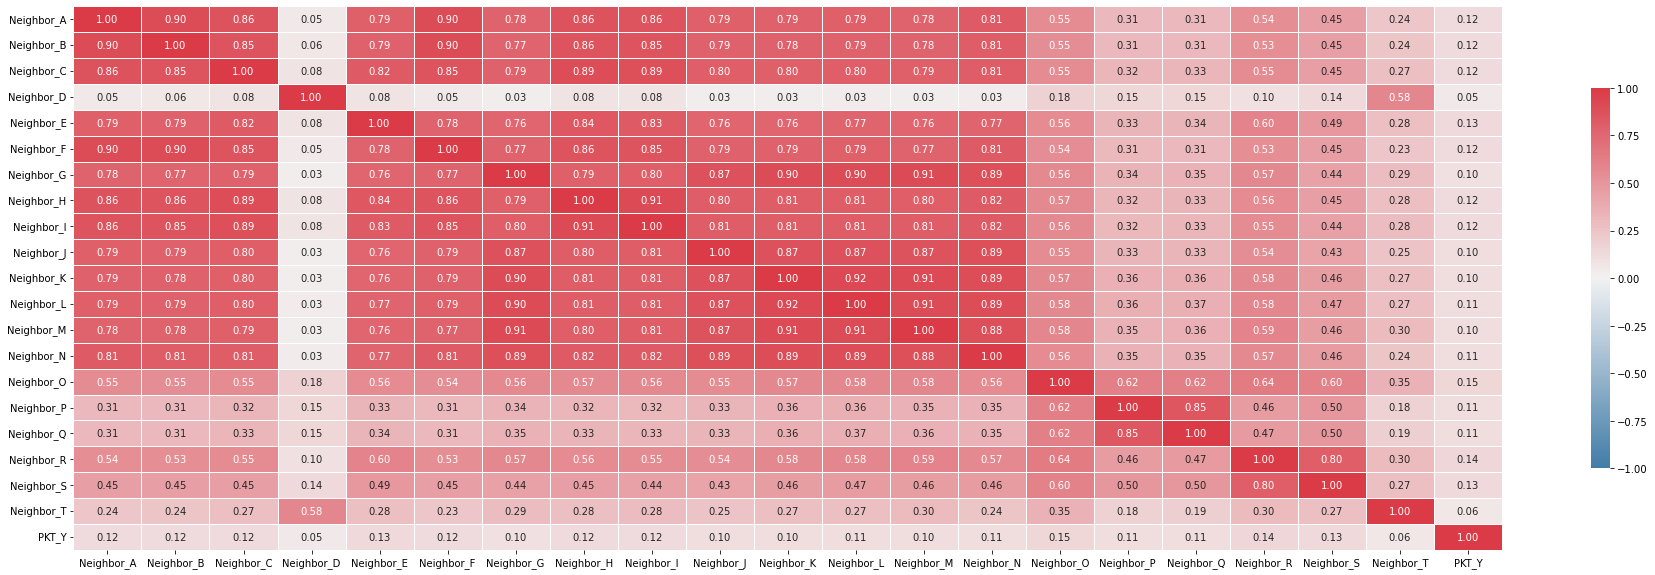

<Figure size 432x288 with 0 Axes>

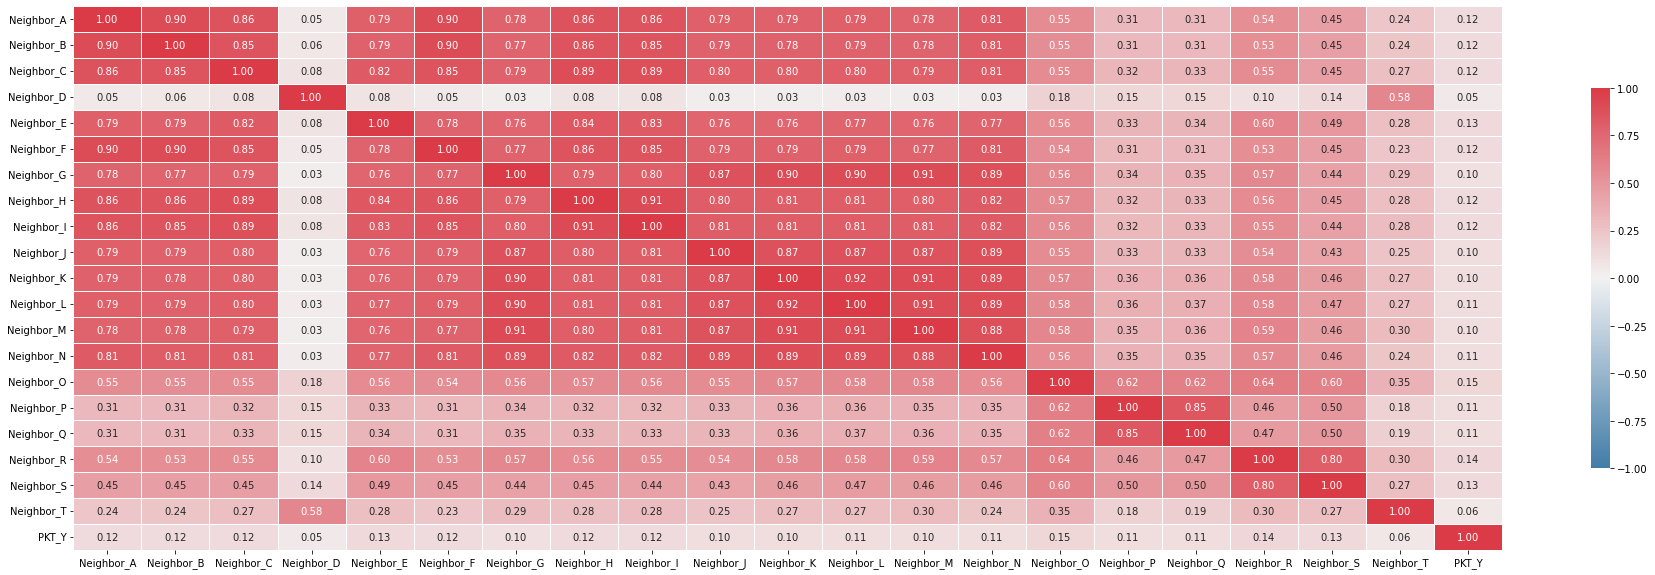

<Figure size 432x288 with 0 Axes>

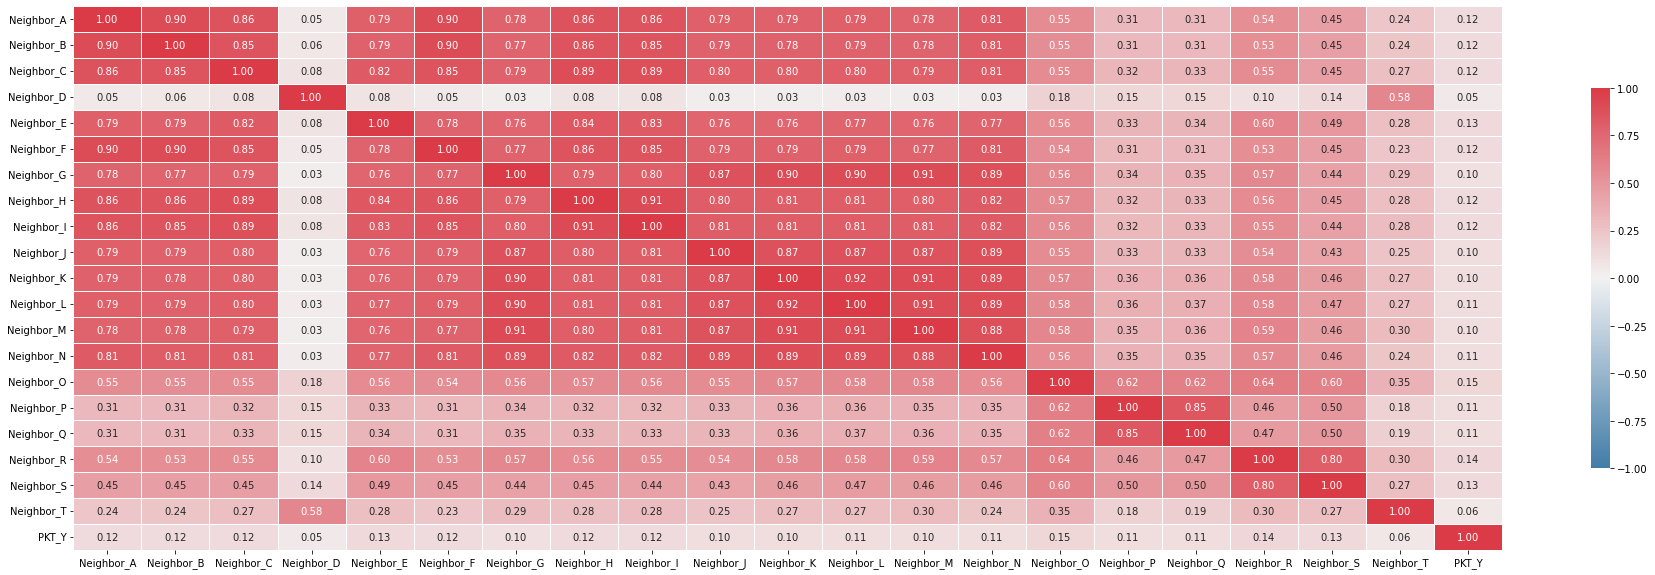

<Figure size 432x288 with 0 Axes>

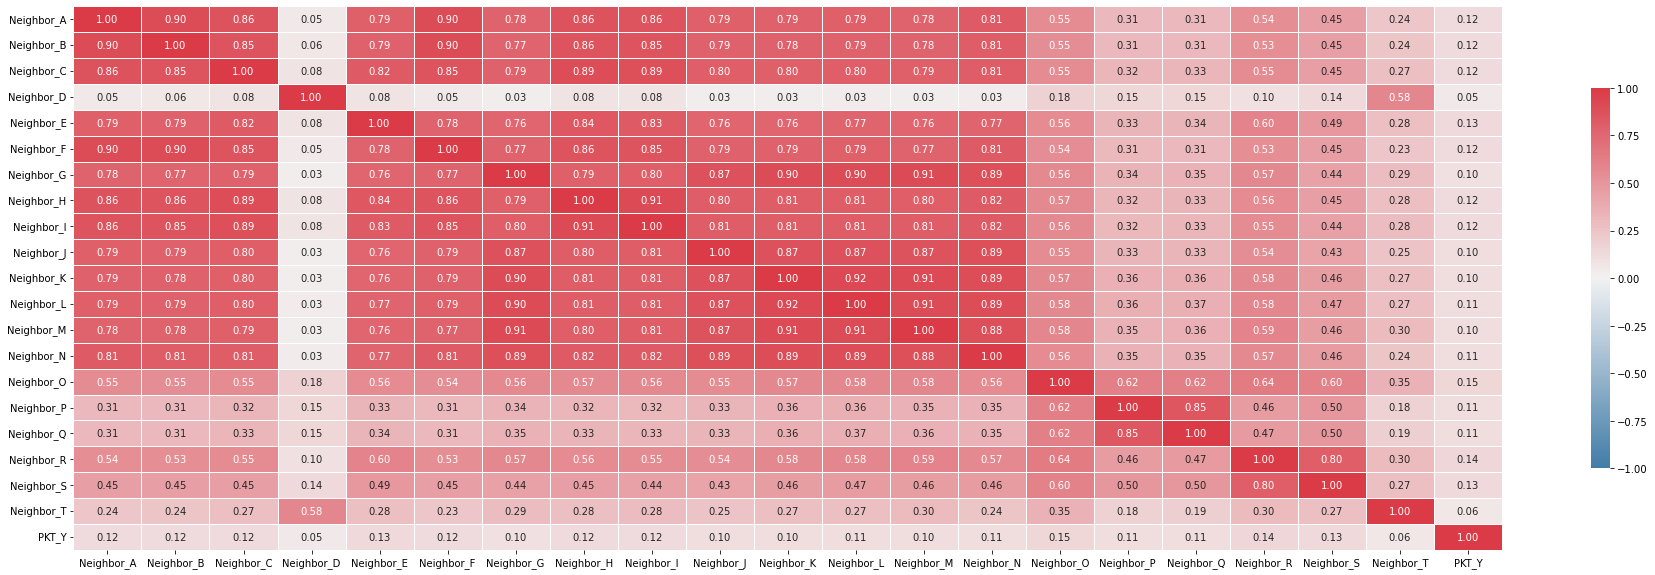

cnt_features :  21
               Weight_Base_A  Weight_Base_B  Weight_Base_C  Weight_Base_D  \
Weight_Base_A       1.000000       0.711828       0.415078      -0.001786   
Weight_Base_B       0.711828       1.000000       0.459564      -0.001838   
Weight_Base_C       0.415078       0.459564       1.000000       0.020455   
Weight_Base_D      -0.001786      -0.001838       0.020455       1.000000   
Weight_Base_E       0.315268       0.402190       0.511609       0.034464   
Weight_Base_F       0.737808       0.800137       0.437481      -0.002950   
Weight_Base_G       0.677867       0.697501       0.364252       0.019032   
Weight_Base_H       0.302935       0.355832       0.214775       0.036962   
Weight_Base_I       0.264790       0.298520       0.401939       0.038463   
Weight_Base_J       0.426251       0.391106       0.230287       0.044261   
Weight_Base_K       0.384514       0.451380       0.390407       0.031283   
Weight_Base_L       0.539537       0.559355       0.46639

<Figure size 432x288 with 0 Axes>

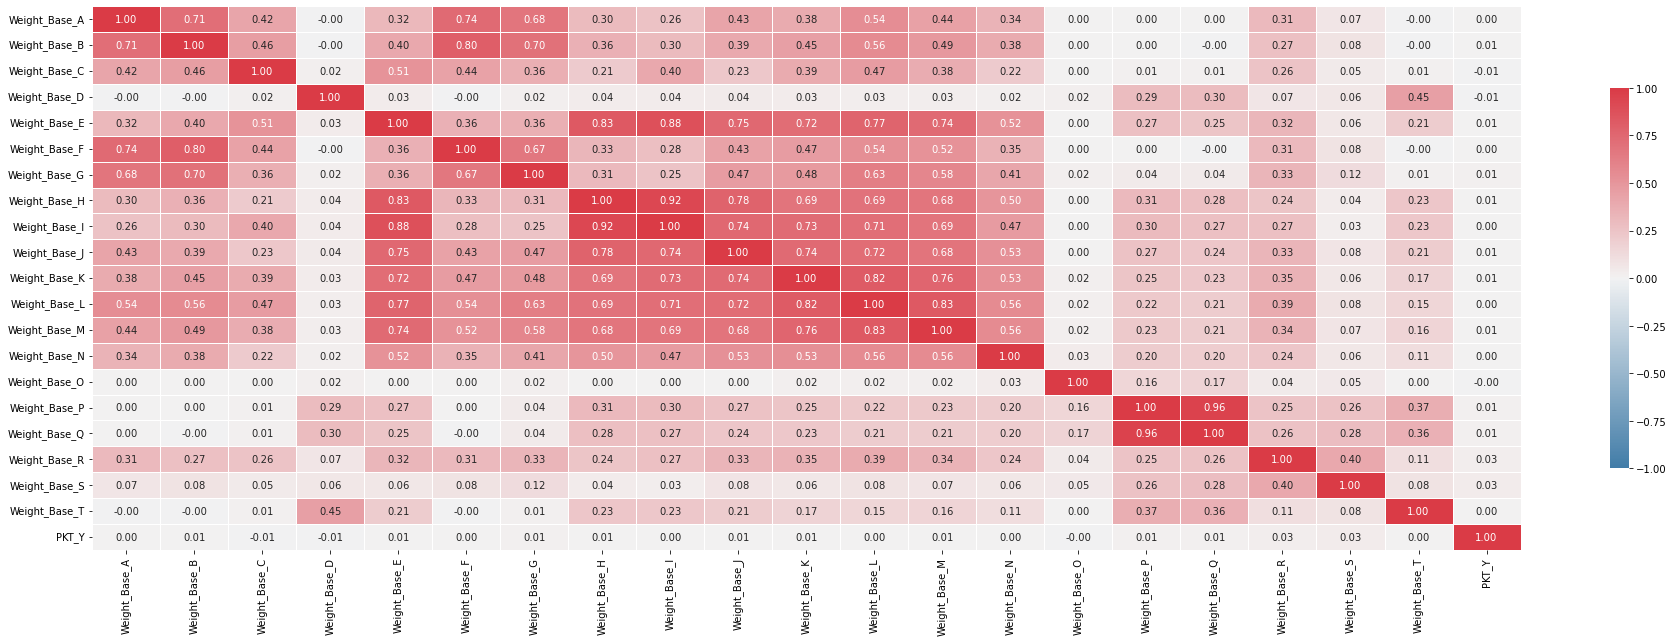

<Figure size 432x288 with 0 Axes>

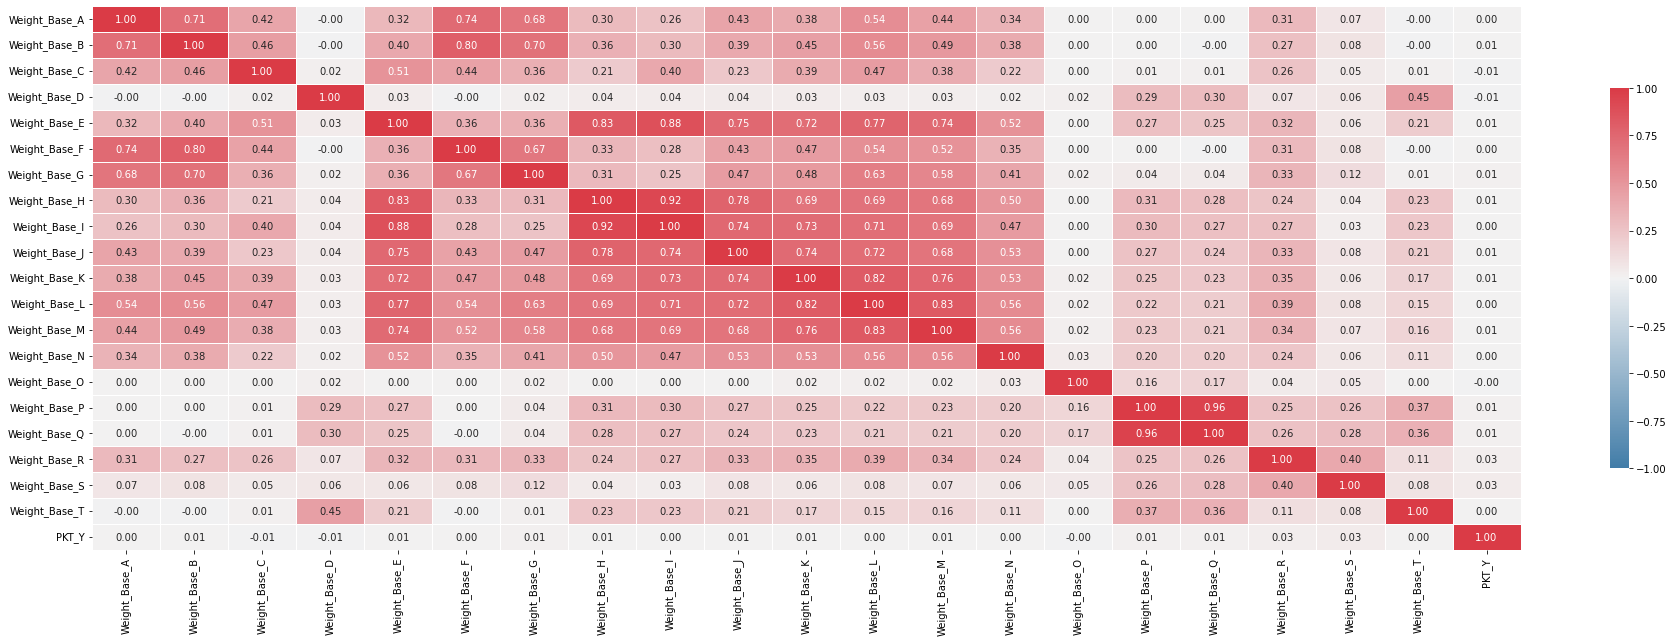

<Figure size 432x288 with 0 Axes>

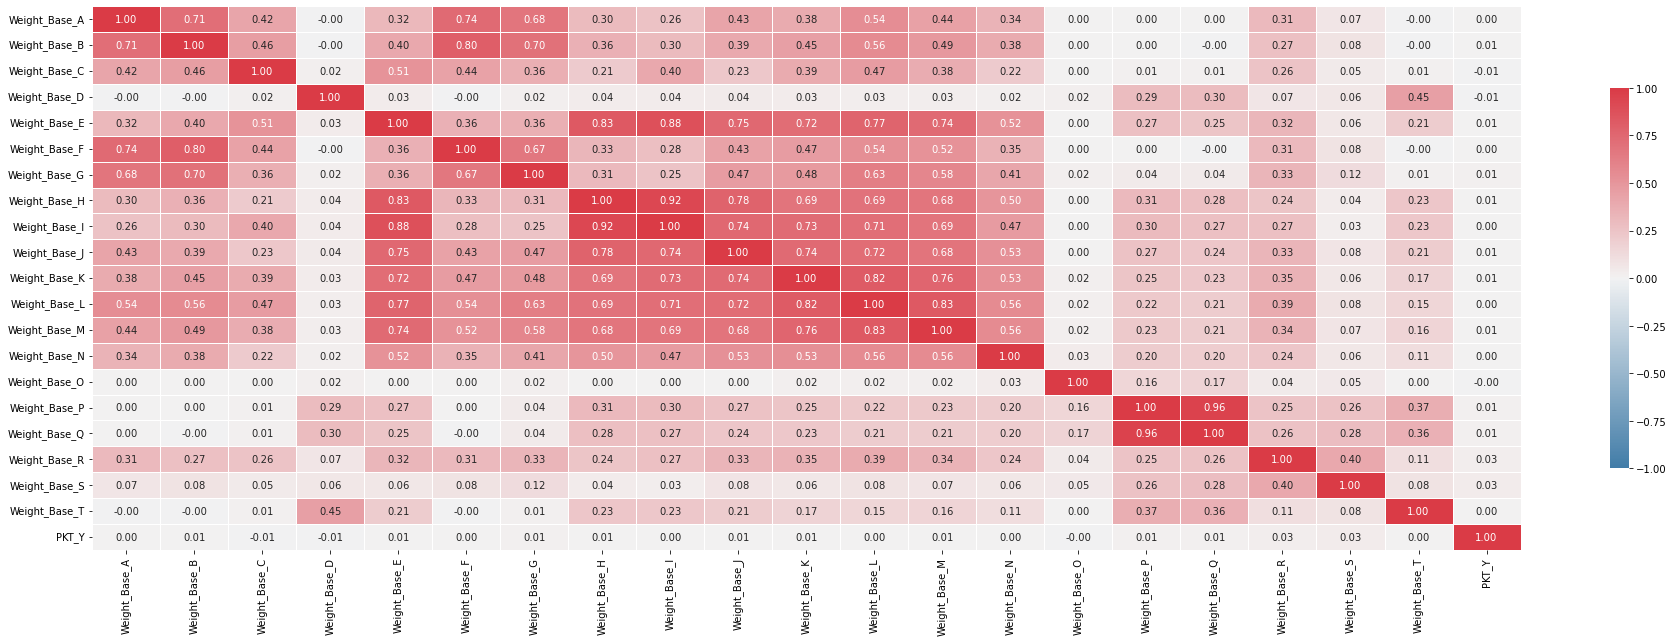

<Figure size 432x288 with 0 Axes>

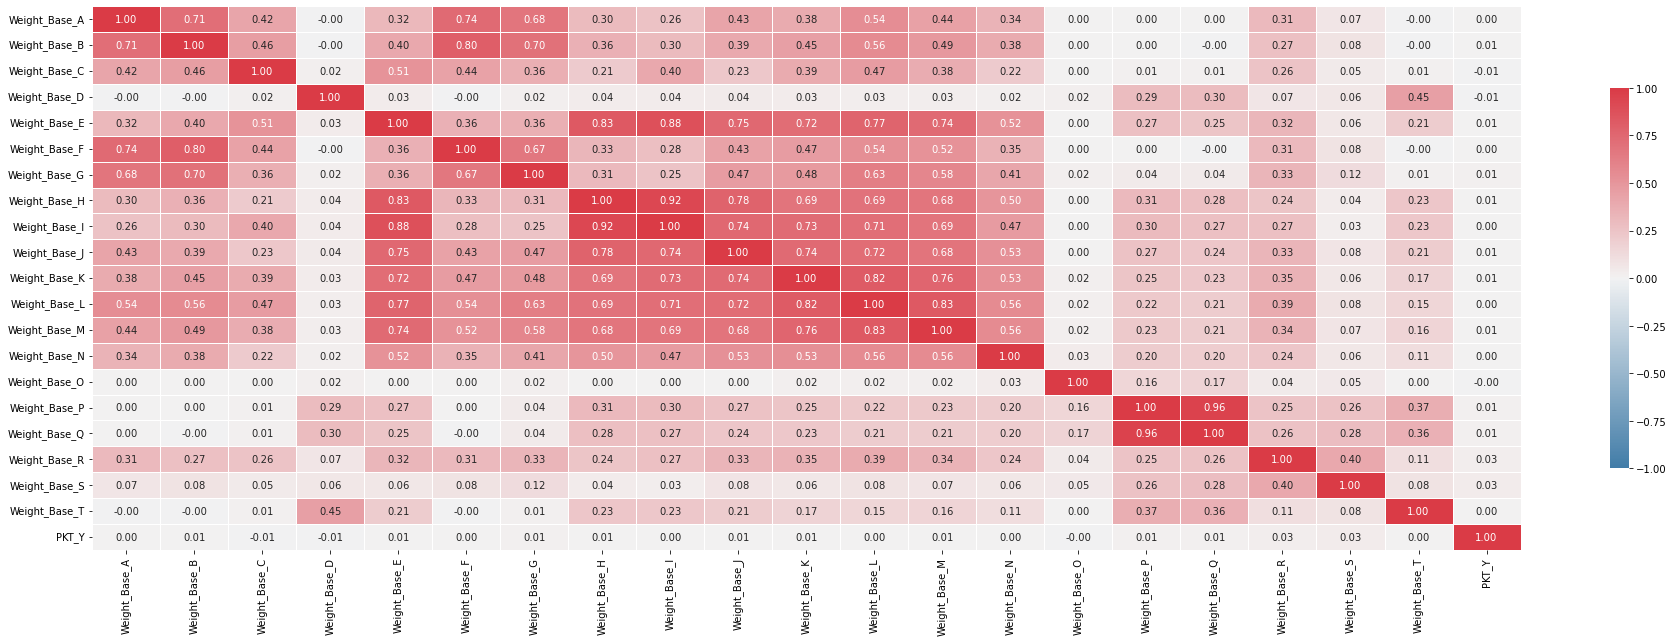

<Figure size 432x288 with 0 Axes>

In [232]:
df_GY = pd.concat([df_G, df_Y], axis=1)
df_NY = pd.concat([df_N, df_Y], axis=1)
df_WY = pd.concat([df_W, df_Y], axis=1)
#df_GY.rename(columns = {0 : 'Y'}, inplace = True)
display(df_GY.head())

draw_heat(df_GY, "GY")
draw_heat(df_NY, "NY")
draw_heat(df_WY, "WY")



,WF_ID,X_AXIS,Y_AXIS,G_A,G_B,G_C,G_D,G_E,G_F,G_G,...,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,PKT_Y,GRADE_CD_N1,GRADE_CD_NQ,GRADE_CD_OQ1,GRADE_CD_SQ
0,14,45,34,0,0,0,0,0,0,0,...,18.4375,4.5,0.0,0.000000,0.000000,0.0,1,0,0,0
1,19,40,43,0,0,0,10,0,0,0,...,0.0000,0.0,0.0,0.857143,7.032967,1.0,1,0,0,0
2,14,32,32,0,0,0,0,0,0,0,...,0.0000,0.0,0.0,0.000000,0.000000,0.0,0,0,0,1
3,12,24,14,6,6,6,6,4,4,0,...,0.0000,0.0,0.0,0.000000,0.000000,0.0,1,0,0,0
4,7,20,34,0,0,0,5,0,0,0,...,0.0000,0.0,0.0,22.777778,0.541667,0.0,0,0,0,1


,WF_ID,X_AXIS,Y_AXIS,G_A,G_B,G_C,G_D,G_E,G_F,G_G,...,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,GRADE_CD_N1,GRADE_CD_NQ,GRADE_CD_SQ
48164,15,27,14,0,0,13,0,26,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1,0,0
49893,19,21,30,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,1
59135,17,60,31,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.375,1,0,0
66312,11,12,26,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,1
29602,7,49,29,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,1


,WF_ID,X_AXIS,Y_AXIS,G_A,G_B,G_C,G_D,G_E,G_F,G_G,...,GRADE_CD_N1,GRADE_CD_NQ,GRADE_CD_OQ1,GRADE_CD_SQ,DIST,DIST_CLASS0,DIST_CLASS1,DIST_CLASS2,DIST_CLASS3,DIST_CLASS4
0,14,45,34,0,0,0,0,0,0,0,...,1,0,0,0,0.638053,False,False,False,True,False
1,19,40,43,0,0,0,10,0,0,0,...,1,0,0,0,0.684012,False,False,False,True,False
2,14,32,32,0,0,0,0,0,0,0,...,0,0,0,1,0.418002,False,False,True,False,False
3,12,24,14,6,6,6,6,4,4,0,...,1,0,0,0,0.073084,True,False,False,False,False
4,7,20,34,0,0,0,5,0,0,0,...,0,0,0,1,0.303318,False,True,False,False,False


cnt_features :  2
           DIST     PKT_Y
DIST   1.000000 -0.075854
PKT_Y -0.075854  1.000000


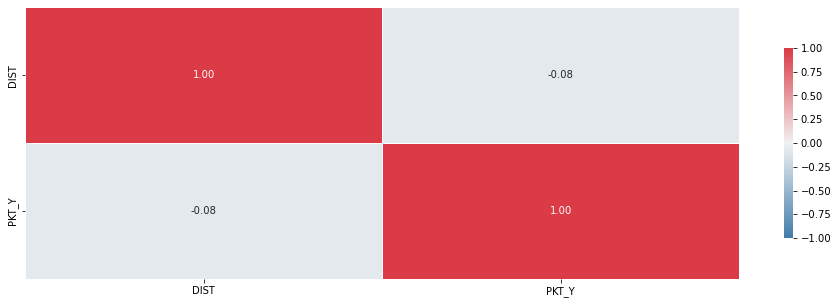

cnt_features :  6
             DIST_CLASS0  DIST_CLASS1  DIST_CLASS2  DIST_CLASS3  DIST_CLASS4  \
DIST_CLASS0     1.000000    -0.216531    -0.232106    -0.219457    -0.157079   
DIST_CLASS1    -0.216531     1.000000    -0.324909    -0.307202    -0.219884   
DIST_CLASS2    -0.232106    -0.324909     1.000000    -0.329299    -0.235700   
DIST_CLASS3    -0.219457    -0.307202    -0.329299     1.000000    -0.222855   
DIST_CLASS4    -0.157079    -0.219884    -0.235700    -0.222855     1.000000   
PKT_Y           0.077507     0.017833    -0.027677    -0.030906    -0.025285   

                PKT_Y  
DIST_CLASS0  0.077507  
DIST_CLASS1  0.017833  
DIST_CLASS2 -0.027677  
DIST_CLASS3 -0.030906  
DIST_CLASS4 -0.025285  
PKT_Y        1.000000  


<Figure size 432x288 with 0 Axes>

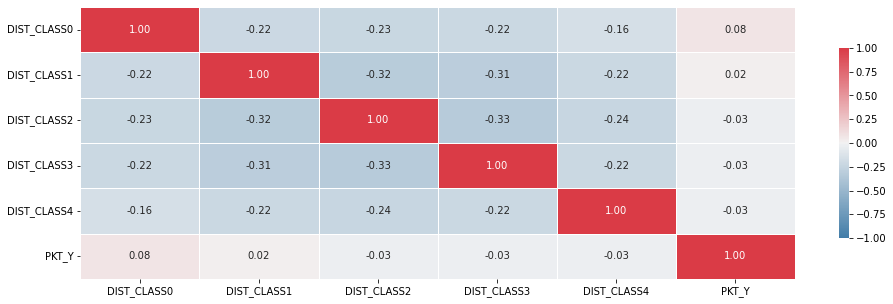

cnt_features :  3
          X_AXIS    Y_AXIS     PKT_Y
X_AXIS  1.000000  0.000978 -0.068584
Y_AXIS  0.000978  1.000000 -0.047998
PKT_Y  -0.068584 -0.047998  1.000000


<Figure size 432x288 with 0 Axes>

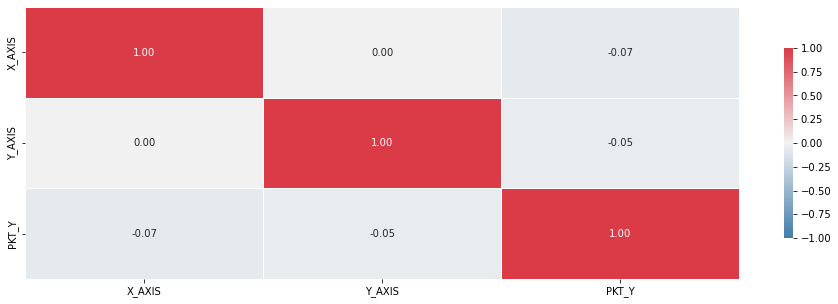

cnt_features :  2
          WF_ID     PKT_Y
WF_ID  1.000000 -0.101219
PKT_Y -0.101219  1.000000


<Figure size 432x288 with 0 Axes>

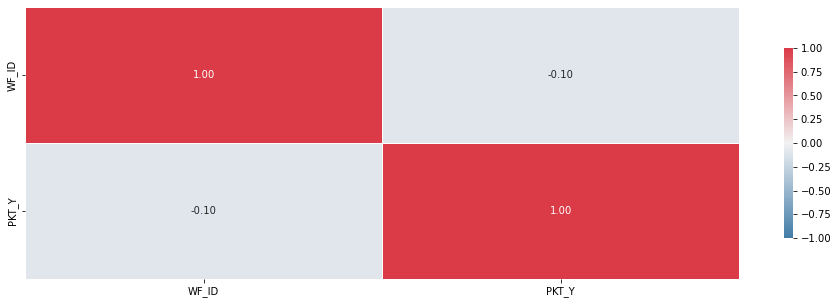

<Figure size 432x288 with 0 Axes>

In [233]:
import math

display(df_train.head())
display(X_train_clean.head())

df_add_dist = df_train
#df_add_dist["DIST"] = math.sqrt(df_add_dist["X_AXIS"]**2 + df_add_dist["Y_AXIS"]**2)
df_add_dist["DIST"] = np.sqrt(df_add_dist["X_AXIS"]**2 + df_add_dist["Y_AXIS"]**2)

max_value = df_add_dist["DIST"].max()
min_value = df_add_dist["DIST"].min()
df_add_dist["DIST"] = (df_add_dist["DIST"] - min_value) / (max_value - min_value)

#df1['ops_on'] = (df1['Feed'] > 10) & (df1['Pressure'] > 10) & (df1['Temp'] > 10)

df_add_dist["DIST_CLASS0"] =  (df_add_dist["DIST"]<=0.2) & (df_add_dist["DIST"]>0)
df_add_dist["DIST_CLASS1"] =  (df_add_dist["DIST"]<=0.4) & (df_add_dist["DIST"]>0.2)
df_add_dist["DIST_CLASS2"] =  (df_add_dist["DIST"]<=0.6) & (df_add_dist["DIST"]>0.4)
df_add_dist["DIST_CLASS3"] =  (df_add_dist["DIST"]<=0.8) & (df_add_dist["DIST"]>0.6)
df_add_dist["DIST_CLASS4"] =  (df_add_dist["DIST"]<=1.0) & (df_add_dist["DIST"]>0.8)

display(df_add_dist.head())

df_DY = pd.concat([df_add_dist["DIST"], df_Y], axis=1)
draw_heat(df_DY, "DY")

df_DY_CLASS = pd.concat([df_add_dist.loc[:,"DIST_CLASS0":"DIST_CLASS4"], df_Y], axis=1)
draw_heat(df_DY_CLASS, "DY_CLASS")


df_XY_CLASS = pd.concat([df_add_dist.loc[:,"X_AXIS":"Y_AXIS"], df_Y], axis=1)
draw_heat(df_XY_CLASS, "XY_CLASS")


df_WID_Y = pd.concat([df_add_dist["WF_ID"], df_Y], axis=1)
draw_heat(df_WID_Y, "WID_Y")



#GRADE_CD_N1	GRADE_CD_NQ	GRADE_CD_OQ1	GRADE_CD_SQ	

,No.,LOT_ID,WF_ID,X_AXIS,Y_AXIS,GRADE_CD,G_A,G_B,G_C,G_D,...,Weight_Bound_L,Weight_Bound_M,Weight_Bound_N,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,PKT_Y
0,1,ABC1111,14,45,34,N1,0,0,0,0,...,0.0,0.0,0.0,2.305556,18.4375,4.5,0.0,0.000000,0.000000,0.0
1,2,ABC1258,19,40,43,N1,0,0,0,10,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.857143,7.032967,1.0
2,3,ABC1258,14,32,32,SQ,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0
3,4,ABC1258,12,24,14,N1,6,6,6,6,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0
4,5,ABC1258,7,20,34,SQ,0,0,0,5,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,22.777778,0.541667,0.0


0    ABC1111
1    ABC1258
2    ABC1258
3    ABC1258
4    ABC1258
Name: LOT_ID, dtype: object

,No.,WF_ID,X_AXIS,Y_AXIS,GRADE_CD,G_A,G_B,G_C,G_D,G_E,...,Weight_Bound_O,Weight_Bound_P,Weight_Bound_Q,Weight_Bound_R,Weight_Bound_S,Weight_Bound_T,PKT_Y,LOT_ID_ABC1111,LOT_ID_ABC1236,LOT_ID_ABC1258
0,1,14,45,34,N1,0,0,0,0,0,...,2.305556,18.4375,4.5,0.0,0.000000,0.000000,0.0,1,0,0
1,2,19,40,43,N1,0,0,0,10,0,...,0.000000,0.0000,0.0,0.0,0.857143,7.032967,1.0,0,0,1
2,3,14,32,32,SQ,0,0,0,0,0,...,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0,0,1
3,4,12,24,14,N1,6,6,6,6,4,...,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0,0,1
4,5,7,20,34,SQ,0,0,0,5,0,...,0.000000,0.0000,0.0,0.0,22.777778,0.541667,0.0,0,0,1


cnt_features :  4
                LOT_ID_ABC1111  LOT_ID_ABC1236  LOT_ID_ABC1258     PKT_Y
LOT_ID_ABC1111        1.000000       -0.309723       -0.539845 -0.062324
LOT_ID_ABC1236       -0.309723        1.000000       -0.633170  0.085536
LOT_ID_ABC1258       -0.539845       -0.633170        1.000000 -0.026711
PKT_Y                -0.062324        0.085536       -0.026711  1.000000


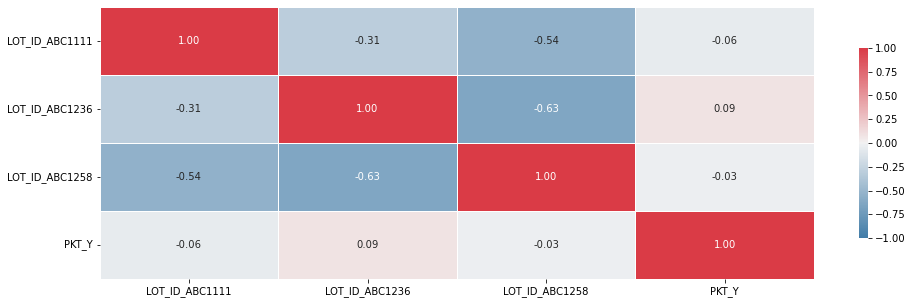

<Figure size 432x288 with 0 Axes>

In [234]:
np.unique(df_train_org["LOT_ID"])

display(df_train_org.head())
display(df_train_org["LOT_ID"].head())
df_new = pd.get_dummies(data = df_train_org, columns = ['LOT_ID'], prefix = 'LOT_ID')
display(df_new.head())

df_LID_Y = pd.concat([df_new.loc[:,"LOT_ID_ABC1111":"LOT_ID_ABC1258"], df_Y], axis=1)



draw_heat(df_LID_Y, "LID_Y")

In [ ]:
    df_train_1 = df_train[df_train['PKT_Y'] == 1]
    df_train_0 = df_train[df_train['PKT_Y'] == 0]

In [237]:
!pip install xgboost

## Feature Selection 

In [238]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import roc_auc_score as auc
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [239]:
K_vs_score_fc = [] 
start = time.time()

for k in range(2, 40, 2):
    start = time.time()
    
    selector_fc = SelectKBest(score_func = f_classif, k = k)

    X_train_selected_fc = selector_fc.fit_transform(X_train_clean, y_train)

    clf = xgb.XGBClassifier(seed=42)
    
    auc_fc = cross_val_score(clf, X_train_selected_fc, y_train, cv = 10, scoring = 'roc_auc')

    K_vs_score_fc.append(auc_fc.mean())
    
    end = time.time()
    
    print("k = {} - auc_fc = {} - Time = {}s".format(k, auc_fc.mean(), end-start))
    
end = time.time()
print(end - start)

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\SNUAI\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



k = 2 - auc_fc = 0.6014091935938916 - Time = 5.313598394393921s
k = 4 - auc_fc = 0.6098838630911214 - Time = 5.825131893157959s
k = 6 - auc_fc = 0.6097374543205109 - Time = 6.628526926040649s
k = 8 - auc_fc = 0.6115070943659826 - Time = 7.32399845123291s
k = 10 - auc_fc = 0.6121646749355593 - Time = 7.194411993026733s
k = 12 - auc_fc = 0.6110214983111663 - Time = 9.112833738327026s
k = 14 - auc_fc = 0.611349967455512 - Time = 10.646193265914917s
k = 16 - auc_fc = 0.6102181627522757 - Time = 11.026233434677124s
k = 18 - auc_fc = 0.6141331553881878 - Time = 10.527776002883911s
k = 20 - auc_fc = 0.6175646619881894 - Time = 10.908868074417114s
k = 22 - auc_fc = 0.6712590267038497 - Time = 11.924469232559204s
k = 24 - auc_fc = 0.6730697707258052 - Time = 13.06583833694458s
k = 26 - auc_fc = 0.681310443306274 - Time = 14.223341941833496s
k = 28 - auc_fc = 0.6817128682251015 - Time = 14.260393619537354s
k = 30 - auc_fc = 0.6818331153806667 - Time = 14.301922082901001s
k = 32 - auc_fc = 0.6815

In [240]:
len(K_vs_score_fc)

19

In [241]:
K_vs_score_mic = [] 

for k in range(2, 20, 2):
    start = time.time()
    
    selector_mic = SelectKBest(score_func = mutual_info_classif, k = k)
    
    X_train_selected_mic = selector_mic.fit_transform(X_train_clean, y_train) 
    
    clf = xgb.XGBClassifier(seed=42)
    
    auc_mic = cross_val_score(clf, X_train_selected_mic, y_train, cv = 10, scoring = 'roc_auc')
    
    K_vs_score_mic.append(auc_mic.mean())
    
    end = time.time()
    
    print("k = {} - auc_mic = {} - Time = {}s".format(k, auc_mic.mean(), end-start))

k = 2 - auc_mic = 0.6609763785213453 - Time = 33.3930287361145s
k = 4 - auc_mic = 0.6732989293414338 - Time = 34.68986225128174s
k = 6 - auc_mic = 0.6739424392741791 - Time = 33.97885084152222s
k = 8 - auc_mic = 0.6785918386375586 - Time = 33.77590751647949s
k = 10 - auc_mic = 0.6772331861597339 - Time = 34.2156126499176s
k = 12 - auc_mic = 0.679567881914076 - Time = 35.50437545776367s
k = 14 - auc_mic = 0.6784149513992282 - Time = 37.08256506919861s
k = 16 - auc_mic = 0.6847316377614192 - Time = 37.05980610847473s
k = 18 - auc_mic = 0.6788318106889527 - Time = 37.47328591346741s


In [242]:
len(K_vs_score_mic)

9

### Select K with f_classif

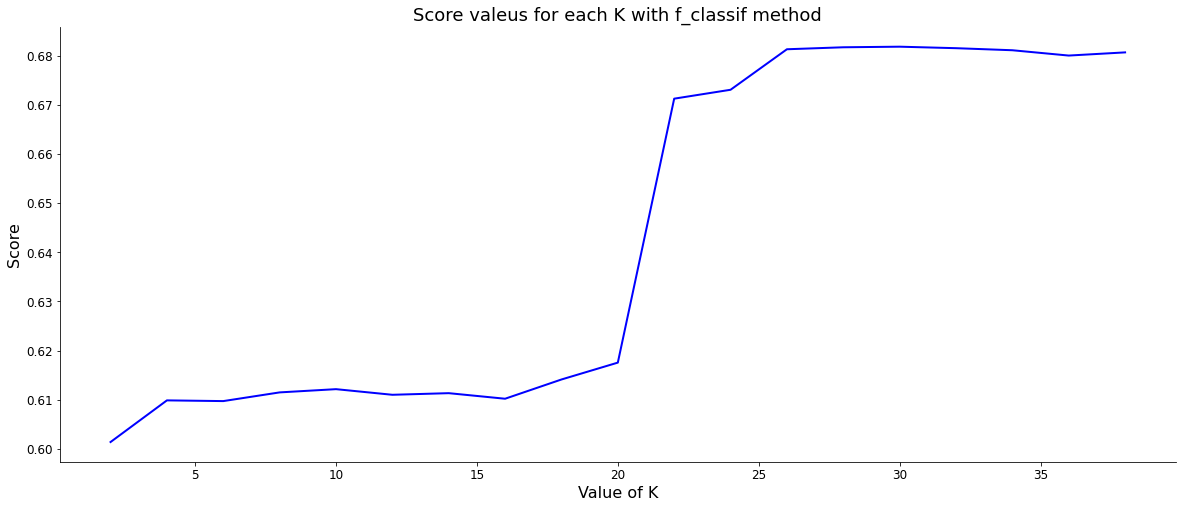

In [243]:
fig, ax = plt.subplots(figsize = (20, 8))

plt.title('Score valeus for each K with f_classif method', fontsize=18)
plt.ylabel('Score', fontsize = 16)
plt.xlabel('Value of K', fontsize = 16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.plot(np.arange(2, 40, 2), K_vs_score_fc, color='blue', linewidth=2)

plt.show()

### Select K with mutual_info_classif

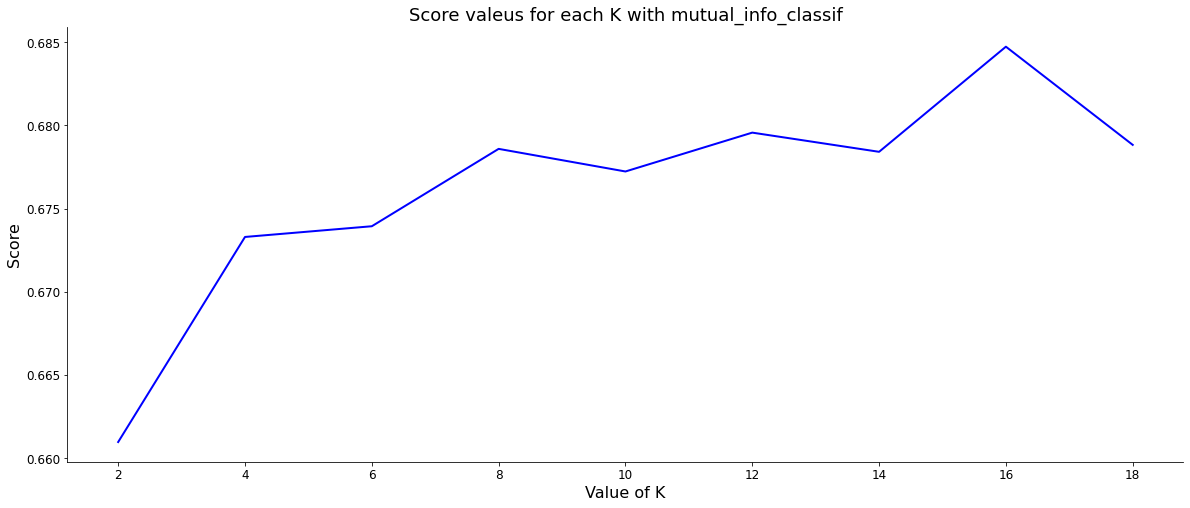

In [244]:
fig, ax = plt.subplots(figsize = (20, 8))

plt.title('Score valeus for each K with mutual_info_classif', fontsize=18)
plt.ylabel('Score', fontsize = 16)
plt.xlabel('Value of K', fontsize = 16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.plot(np.arange(2, 20, 2), K_vs_score_mic, color='blue', linewidth=2)

plt.show()

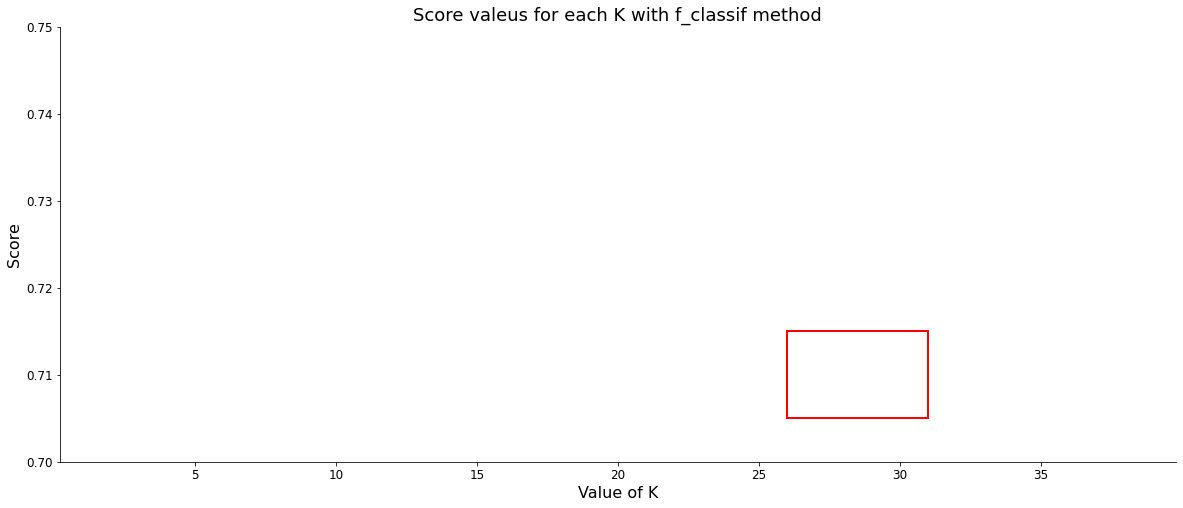

In [245]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize = (20, 8))

plt.title('Score valeus for each K with f_classif method', fontsize=18)
plt.ylabel('Score', fontsize = 16)
plt.xlabel('Value of K', fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.plot(np.arange(2, 40, 2), K_vs_score_fc, color='blue', linewidth=2)
ax.set_ylim(0.70, 0.75);

rect = patches.Rectangle((26, 0.705), 5, (0.73 - 0.72), linewidth=2, edgecolor='r', facecolor='none')

ax.add_patch(rect)

plt.show()

In [246]:
selector_fc = SelectKBest(score_func = f_classif, k = 28)
selector_fc.fit(X_train_clean, y_train)
mask_selected = selector_fc.get_support()


print(mask_selected)

selected_col = X_train_clean.columns[mask_selected]
selected_col

[ True  True False False False  True False  True  True False False  True
 False False False False False  True False False  True  True False  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True]


Index(['WF_ID', 'X_AXIS', 'G_C', 'G_E', 'G_F', 'G_I', 'G_O', 'G_R', 'G_S',
       'Neighbor_A', 'Neighbor_B', 'Neighbor_C', 'Neighbor_E', 'Neighbor_F',
       'Neighbor_G', 'Neighbor_H', 'Neighbor_I', 'Neighbor_J', 'Neighbor_K',
       'Neighbor_L', 'Neighbor_M', 'Neighbor_N', 'Neighbor_O', 'Neighbor_P',
       'Neighbor_Q', 'Neighbor_R', 'Neighbor_S', 'GRADE_CD_SQ'],
      dtype='object')

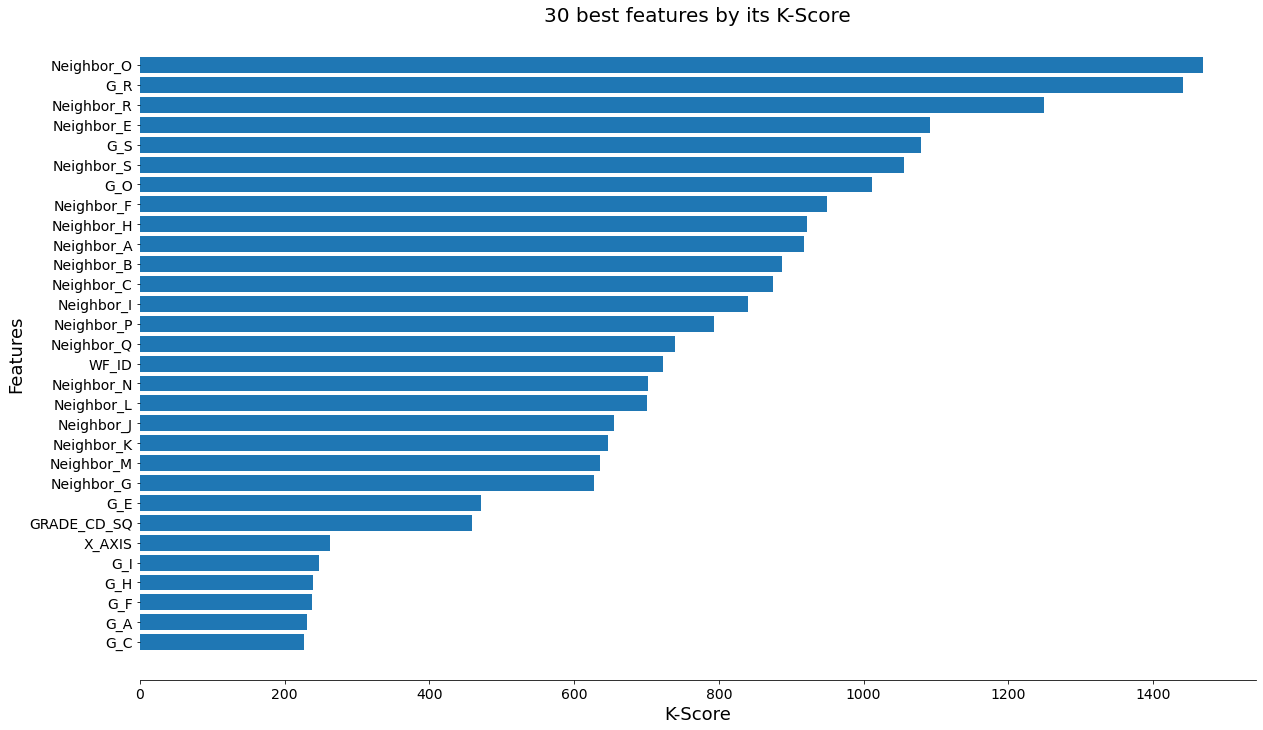

In [67]:
feature_score = pd.Series(selector_fc.scores_, index=X_train_clean.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(feature_score.index[0:30], feature_score[0:30])
plt.gca().invert_yaxis()


ax.set_xlabel('K-Score', fontsize=18);
ax.set_ylabel('Features', fontsize=18);
ax.set_title('30 best features by its K-Score', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

In [252]:
X_train_selected = X_train[selected_col]
X_test_selected = X_test[selected_col]

In [253]:
X_train_selected.head()

,WF_ID,X_AXIS,G_C,G_E,G_F,G_I,G_O,G_R,G_S,Neighbor_A,...,Neighbor_K,Neighbor_L,Neighbor_M,Neighbor_N,Neighbor_O,Neighbor_P,Neighbor_Q,Neighbor_R,Neighbor_S,GRADE_CD_SQ
48164,15,27,13,26,0,6,0,28,0,2,...,5,5,5,5,5,1,0,9,3,0
49893,19,21,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,1,2,1
59135,17,60,0,0,0,0,0,0,5,1,...,1,0,0,0,0,0,0,0,2,0
66312,11,12,0,0,0,0,14,48,24,7,...,6,7,7,6,5,3,3,9,9,1
29602,7,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [254]:
X_test_selected.head()

,WF_ID,X_AXIS,G_C,G_E,G_F,G_I,G_O,G_R,G_S,Neighbor_A,...,Neighbor_K,Neighbor_L,Neighbor_M,Neighbor_N,Neighbor_O,Neighbor_P,Neighbor_Q,Neighbor_R,Neighbor_S,GRADE_CD_SQ
41073,2,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,3,1
34382,20,61,0,0,0,0,0,0,0,0,...,1,1,2,0,1,2,1,2,2,0
48763,7,36,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
66696,16,39,0,0,0,0,15,0,0,0,...,0,0,0,0,3,4,2,2,3,1
63254,4,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0


## Baysian Optimization & XGBoost Classification

In [248]:
!pip install scikit-optimize

In [255]:
from skopt import forest_minimize

In [256]:
def tune_xgbc(params):

    print(params)
    learning_rate = params[0] 
    n_estimators = params[1] 
    max_depth = params[2]
    min_child_weight = params[3]
    gamma = params[4]
    subsample = params[5]
    colsample_bytree = params[6]
        
    mdl = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators = n_estimators, max_depth = max_depth, 
                            min_child_weight = min_child_weight, gamma = gamma, subsample = subsample, 
                            colsample_bytree = colsample_bytree, seed = 42)
    
    auc = cross_val_score(mdl, X_train_selected, y_train, cv = 10, scoring = 'roc_auc')
    
    print(auc.mean())

    return -auc.mean()

In [257]:
space = [(1e-3, 1e-1, 'log-uniform'), # learning rate
          (100, 2000), # n_estimators
          (1, 10), # max_depth 
          (1, 6.), # min_child_weight 
          (0, 0.5), # gamma 
          (0.5, 1.), # subsample 
          (0.5, 1.)] # colsample_bytree 

result = forest_minimize(tune_xgbc, space, random_state = 42, n_random_starts = 20, n_calls  = 25, verbose = 1)

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 1394, 8, 3.9932924209851834, 0.07800932022121827, 0.5779972601681014, 0.5290418060840998]
0.6712379095471444
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 11089.2777
Function value obtained: -0.6712
Current minimum: -0.6712
Iteration No: 2 started. Evaluating function at random point.
[0.05399484409787437, 1223, 8, 4.540362888980228, 0.010292247147901225, 0.9849549260809973, 0.916221320400211]
0.6729396898522009
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 233.0673
Function value obtained: -0.6729
Current minimum: -0.6729
Iteration No: 3 started. Evaluating function at random point.
[0.0026587543983272693, 1315, 5, 4.087407548138583, 0.3058265802441405, 0.5035331526098588, 0.5115312125207079]
0.6893473850175263
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 163.9974
Function value obtained: -0.6893
Current minimum: -0.6893
Iteration No: 4

In [258]:
hyperparameters = ['learning rate', 'n_estimators', 'max_depth', 'min_child_weight', 'gamma', 'subsample',
                   'colsample_bytree']

for i in range(0, len(result.x)): 
    print('{}: {}'.format(hyperparameters[i], result.x[i]))

learning rate: 0.006162586615353729
n_estimators: 747
max_depth: 8
min_child_weight: 1.0703991135754223
gamma: 0.0994212020444026
subsample: 0.8556709763743251
colsample_bytree: 0.8950877702656029


In [259]:
from skopt.plots import plot_convergence

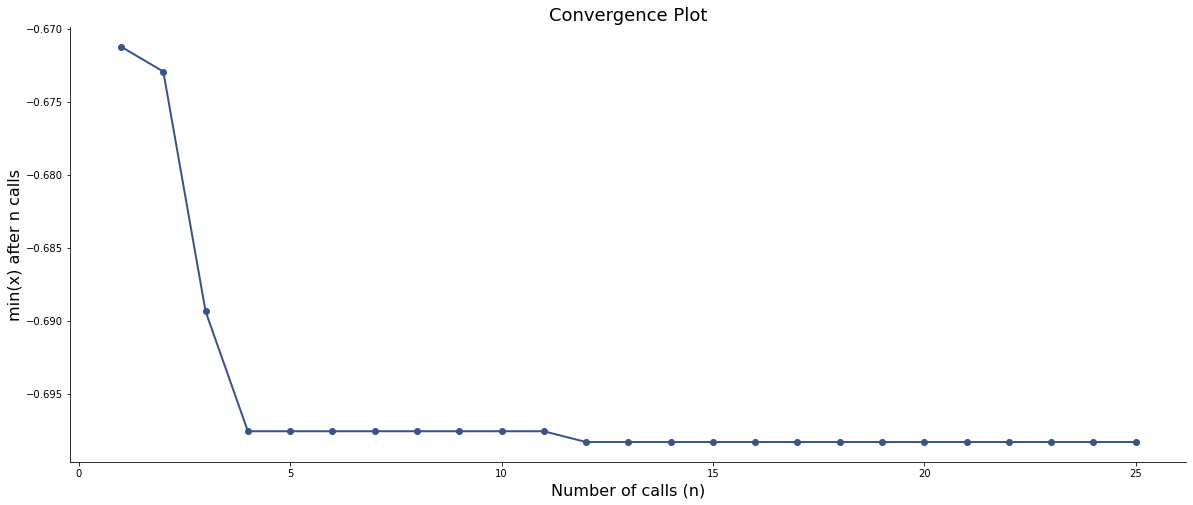

In [260]:
fig, ax = plt.subplots(figsize = (20,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(b = None)

plot_convergence(result)

ax.set_title('Convergence Plot', fontsize = 18)
ax.set_xlabel('Number of calls (n)', fontsize = 16)
ax.set_ylabel('min(x) after n calls', fontsize = 16);

In [261]:
clf_optimized = xgb.XGBClassifier(learning_rate = result.x[0], n_estimators = result.x[1], max_depth = result.x[2], 
                            min_child_weight = result.x[3], gamma = result.x[4], subsample = result.x[5], 
                            colsample_bytree = result.x[6], seed = 42)

In [262]:
clf_optimized.fit(X_train_selected, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8950877702656029, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0994212020444026, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.006162586615353729, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1.0703991135754223,
              missing=nan, monotone_constraints='()', n_estimators=747,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [263]:
y_predicted = clf_optimized.predict_proba(X_test_selected)[:,1]
auc(y_test, y_predicted)

0.6995959890312563

In [264]:
X_test_select = df_test[selected_col]

In [265]:
y_pred = clf_optimized.predict(X_test_select)
print(np.unique(y_pred))

[0 1]


In [266]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='macro', beta=2)

ValueError: Found input variables with inconsistent numbers of samples: [14422, 38479]

In [ ]:
sub = pd.Series(y_pred, name = 'PKT_Y')
sub.to_csv('challenge_sample_submission.csv')

In [ ]:
# For further iterations on this project in order to improve the analysis and the results, I would suggest 3 main points:

# Work on feature engineering creating new features if possible;
# Try out different ML algorithms and compare them to the XGBClassifier